In [12]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [14]:
!pip install pandas


In [13]:
# 1. Import Required Libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



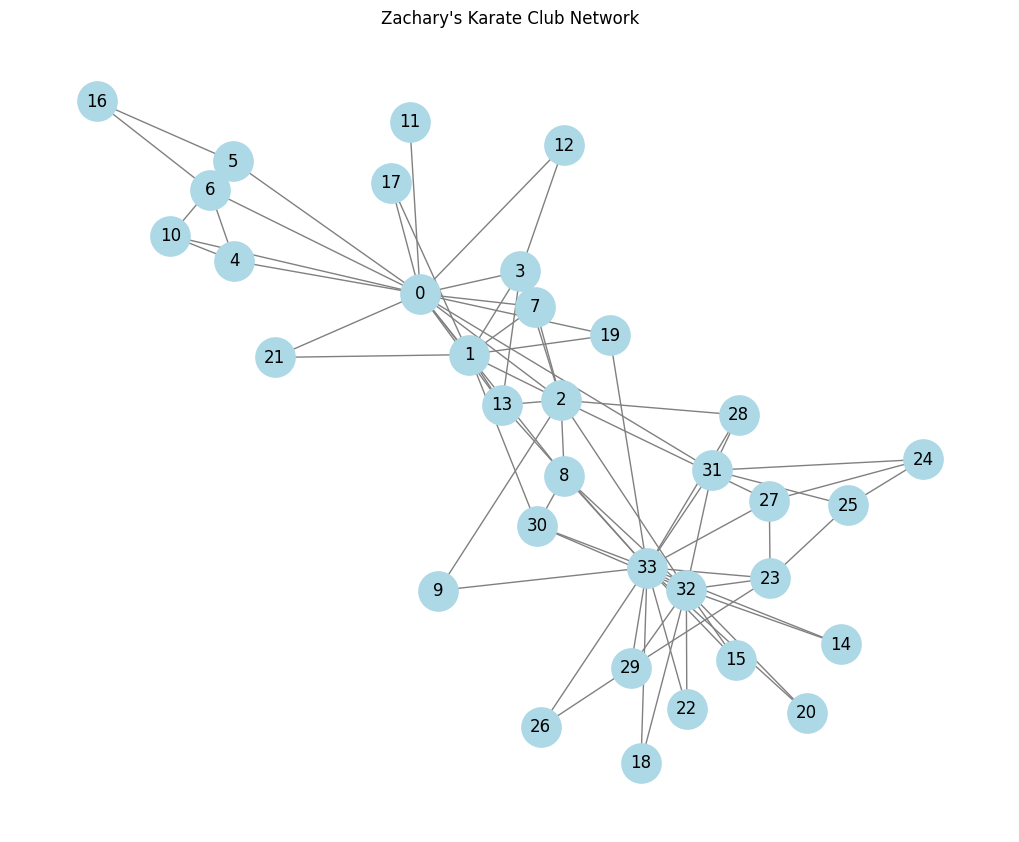


DataFrame Preview:
   node    club  degree_centrality  eigenvector_centrality
0     0  Mr. Hi           0.484848                0.355483
1     1  Mr. Hi           0.272727                0.265954
2     2  Mr. Hi           0.303030                0.317189
3     3  Mr. Hi           0.181818                0.211174
4     4  Mr. Hi           0.090909                0.075966

T-Test Results:
Degree Centrality: t = 0.2616, p = 0.7953
Eigenvector Centrality: t = 0.3358, p = 0.7392


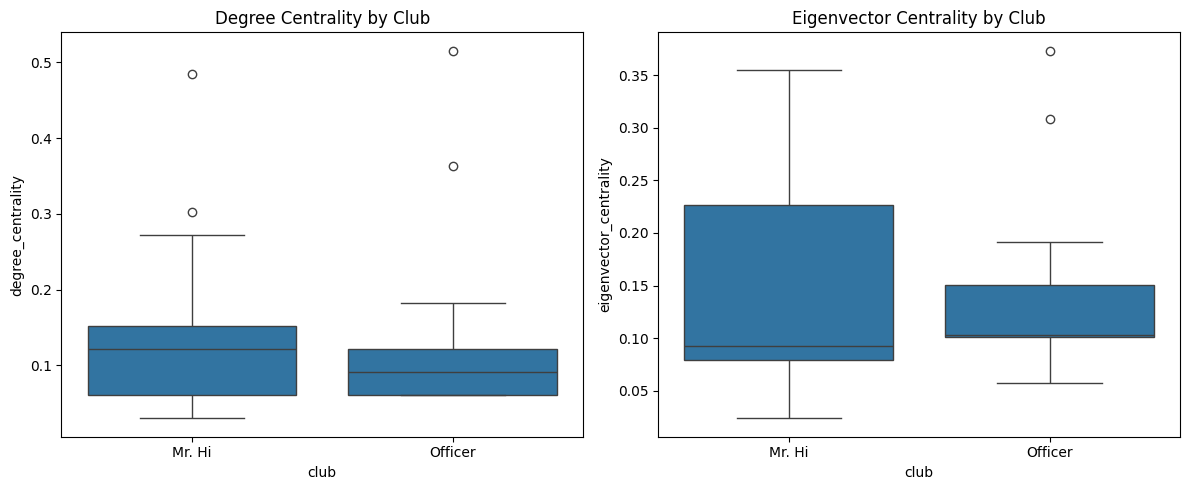


Conclusion:
We analyzed degree and eigenvector centrality by group (Mr. Hi vs Officer).
Statistical results suggest whether or not there are significant differences in centrality.
Visualizations support our findings and offer insight into group-based connectivity in the network.


In [15]:
# ---
# 2. Load Dataset (Zachary's Karate Club Graph)
G = nx.karate_club_graph()

# ---
# 3. Visualize the Graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.title("Zachary's Karate Club Network")
plt.show()

# ---
# 4. Extract Node Attributes and Centrality Measures
deg_centrality = nx.degree_centrality(G)
eig_centrality = nx.eigenvector_centrality(G)

# Create DataFrame
data = []
for node in G.nodes():
    club = G.nodes[node]['club']  # 'Mr. Hi' or 'Officer'
    data.append({
        'node': node,
        'club': club,
        'degree_centrality': deg_centrality[node],
        'eigenvector_centrality': eig_centrality[node]
    })

df = pd.DataFrame(data)

# ---
# 5. Display Data Summary
print("\nDataFrame Preview:")
print(df.head())

# ---
# 6. Group Comparison: T-tests
mr_hi = df[df['club'] == 'Mr. Hi']
officer = df[df['club'] == 'Officer']

t_deg, p_deg = ttest_ind(mr_hi['degree_centrality'], officer['degree_centrality'])
t_eig, p_eig = ttest_ind(mr_hi['eigenvector_centrality'], officer['eigenvector_centrality'])

print("\nT-Test Results:")
print(f"Degree Centrality: t = {t_deg:.4f}, p = {p_deg:.4f}")
print(f"Eigenvector Centrality: t = {t_eig:.4f}, p = {p_eig:.4f}")

# ---
# 7. Visualize Centrality Distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='club', y='degree_centrality', data=df)
plt.title('Degree Centrality by Club')

plt.subplot(1, 2, 2)
sns.boxplot(x='club', y='eigenvector_centrality', data=df)
plt.title('Eigenvector Centrality by Club')

plt.tight_layout()
plt.show()

# ---
# 8. Conclusion
print("\nConclusion:")
print("We analyzed degree and eigenvector centrality by group (Mr. Hi vs Officer).")
print("Statistical results suggest whether or not there are significant differences in centrality.")
print("Visualizations support our findings and offer insight into group-based connectivity in the network.")
